# Manifold mixup

This is a short demo of [manifold mixup](http://proceedings.mlr.press/v97/verma19a/verma19a.pdf) inspired by fast.ai's [input mixup demo](http://dev.fast.ai/callback.mixup).

In [1]:
from fastai2.vision.all import *
from manifold_mixup import *

Get the dataset:

In [2]:
path = untar_data(URLs.MNIST_TINY)
items = get_image_files(path)
datasets = Datasets(items, tfms=[PILImageBW.create, [parent_label, Categorize]], splits=GrandparentSplitter()(items))
databunch = datasets.dataloaders(after_item=[ToTensor(), IntToFloatTensor()])

Defines the model:

In [3]:
def conv(ni, nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)
def simple_cnn():
    return nn.Sequential(conv(1, 3), nn.BatchNorm2d(3), nn.ReLU(inplace=False),
                         conv(3, 16), nn.BatchNorm2d(16), nn.ReLU(inplace=False),
                         conv(16,16), nn.BatchNorm2d(16), nn.ReLU(inplace=False),
                         conv(16, 2), nn.BatchNorm2d(2), Flatten() )

## No mixup

epoch,train_loss,valid_loss,accuracy,time
0,1.483895,1.998202,0.323319,00:00
1,1.255362,1.637292,0.821173,00:00
2,1.130649,1.146826,0.918455,00:00
3,1.049687,0.903758,0.937053,00:00
4,0.989615,0.779143,0.948498,00:00
5,0.940934,0.741016,0.955651,00:00
6,0.900842,0.735724,0.957082,00:00
7,0.865705,0.716212,0.962804,00:00


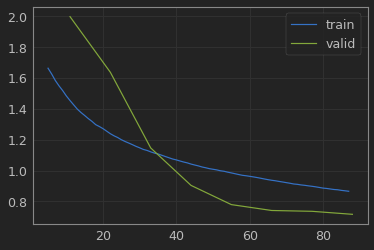

In [4]:
model = simple_cnn()
learn = Learner(databunch, model, metrics=accuracy)
learn.fit(8)
learn.recorder.plot_loss()

## Input mixup

epoch,train_loss,valid_loss,accuracy,time
0,1.593526,1.957649,0.875537,00:00
1,1.377605,1.781567,0.831187,00:00
2,1.261851,1.390640,0.869814,00:00
3,1.185706,0.988617,0.915594,00:00
4,1.128194,0.797835,0.935622,00:00
5,1.081235,0.732375,0.945637,00:00
6,1.043010,0.710181,0.951359,00:00
7,1.008264,0.697532,0.952790,00:00


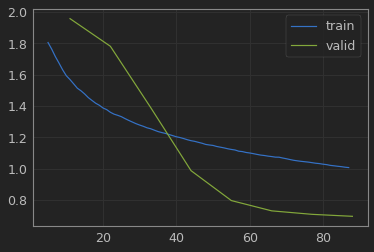

In [5]:
model = simple_cnn()
learn = Learner(databunch, model, metrics=accuracy, cbs=MixUp())
learn.fit(8)
learn.recorder.plot_loss()

## Manifold mixup

Manifold mixup: no known network structure detected, 8 modules will be used for mixup.


epoch,train_loss,valid_loss,accuracy,time
0,1.681522,1.967035,0.608011,00:00
1,1.485040,1.834165,0.802575,00:00
2,1.366220,1.585334,0.874106,00:00
3,1.282640,1.226671,0.911302,00:00
4,1.212919,1.012693,0.922747,00:00
5,1.161626,0.913548,0.929900,00:00
6,1.109320,0.864612,0.937053,00:00
7,1.066193,0.811688,0.941345,00:00


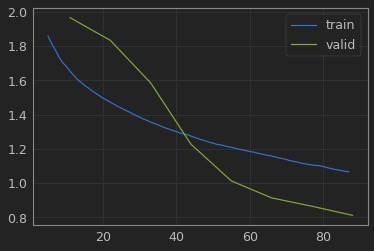

In [6]:
model = simple_cnn()
learn = Learner(databunch, model, metrics=accuracy, cbs=ManifoldMixup())
learn.fit(8)
learn.recorder.plot_loss()

## Output mixup
With a user defined alpha:

Output mixup: the loss function is now properly wrapped.


epoch,train_loss,valid_loss,accuracy,time
0,1.529657,1.870712,0.782547,00:00
1,1.390479,1.470400,0.898426,00:00
2,1.284111,1.170951,0.891273,00:00
3,1.207001,0.974278,0.911302,00:00
4,1.152648,0.864463,0.927039,00:00
5,1.106762,0.803530,0.941345,00:00
6,1.063442,0.762598,0.942775,00:00
7,1.027752,0.742696,0.948498,00:00


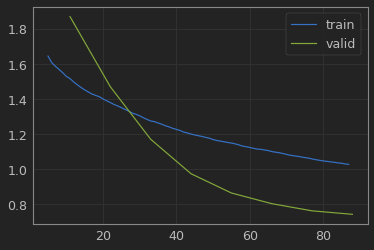

In [7]:
model = simple_cnn()
learn = Learner(databunch, model, metrics=accuracy, cbs=OutputMixup(alpha=0.4))
learn.fit(8)
learn.recorder.plot_loss()

# Dynamic mixup

In [8]:
from dynamic_mixup import *

## Manifold mixup
With a user defined alpha max:

Scheduler detected, growing alpha from 0.0 to 0.6
Manifold mixup: no known network structure detected, 8 modules will be used for mixup.


epoch,train_loss,valid_loss,accuracy,time
0,1.675571,1.900225,0.650930,00:01
1,1.438497,1.681676,0.891273,00:00
2,1.292215,1.301786,0.934192,00:00
3,1.197444,0.963463,0.942775,00:00
4,1.142599,0.845274,0.941345,00:00
5,1.097150,0.799492,0.942775,00:00
6,1.059650,0.759164,0.947067,00:00
7,1.023124,0.730461,0.955651,00:00


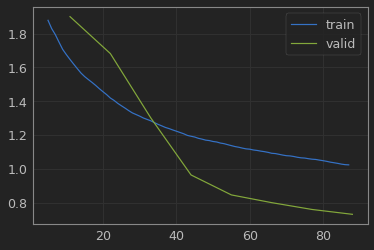

In [9]:
model = simple_cnn()
learn = Learner(databunch, model, metrics=accuracy, cbs=DynamicManifoldMixup(alpha_max=0.6))
learn.fit(8)
learn.recorder.plot_loss()

## Output mixup
With a user defined scheduler:

Output mixup: the loss function is now properly wrapped.


epoch,train_loss,valid_loss,accuracy,time
0,1.611997,1.995794,0.639485,00:00
1,1.381242,1.760774,0.699571,00:00
2,1.257533,1.293029,0.905579,00:00
3,1.186046,0.949555,0.919886,00:00
4,1.132896,0.842676,0.944206,00:00
5,1.092106,0.790870,0.945637,00:00
6,1.063431,0.769612,0.954220,00:00
7,1.038905,0.735526,0.952790,00:00


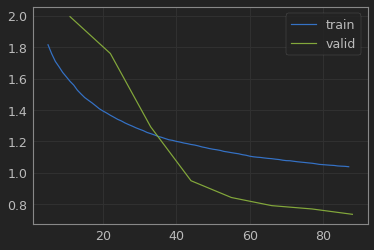

In [11]:
model = simple_cnn()
learn = Learner(databunch, model, metrics=accuracy, cbs=DynamicOutputMixup(scheduler=SchedLin, alpha_min=0., alpha_max=0.6))
learn.fit(8)
learn.recorder.plot_loss()